Стохастический градиентный спуск

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split

In [ ]:
class LinearRegressionGD:
    def __init__(self, lr=0.01, max_iter=1000, tol=1e-3, intercept = True):
        # скорость обучения градиентного спуска
        self.learning_rate = lr
        # максимальное число итераций
        self.max_iteration = max_iter
        # критерий сходимости
        self.tolerance_convergence  = tol
        # наличие свободного члена
        self.intercept = intercept
        # инициальзация весов: None
        self.theta = None
        self.n = None
        self.d = None

    def fit(self, X, y):
        self.X = X.copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))
        # размерность вектора X
        self.n, self.d = self.X.shape
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        step = 0
        for _ in range(self.max_iteration):
            grad = self.gradient(self.X, y)
            self.theta -= self.learning_rate * grad
            new_error = ((y - self.predict(X)).T @ (y - self.predict(X))) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors

    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)

    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta

    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)

    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()

    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()

Время обучения: 0.05338644981384277
MSE:  3.721195629033963
Коэффициенты:  [5.76629888 1.15387497 1.55578821 2.89627539 4.25008373 4.97328284]


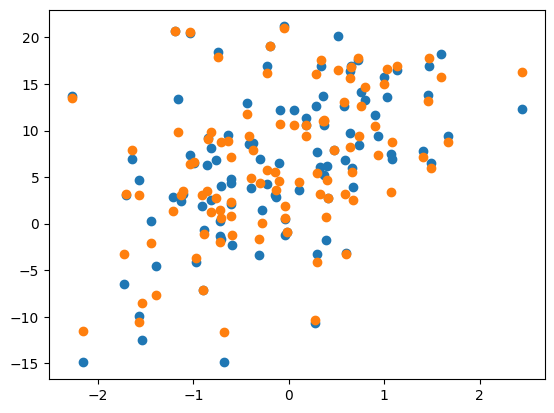

In [ ]:
X = np.random.randn(100, 5)
y = X @ np.array([1, 2, 3, 4, 5]) + np.random.randn(100) * 2 + 6

start_time = time.time()
modelGD = LinearRegressionGD(lr=0.01, max_iter=400, tol=1e-3, intercept = True)
steps, errors = modelGD.fit(X, y)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
y_pred = modelGD.predict(X)
print("MSE: ", modelGD.MSE(X, y))
print("Коэффициенты: ", modelGD.theta)
plt.scatter(X[:,2], y)
plt.scatter(X[:,2], y_pred)

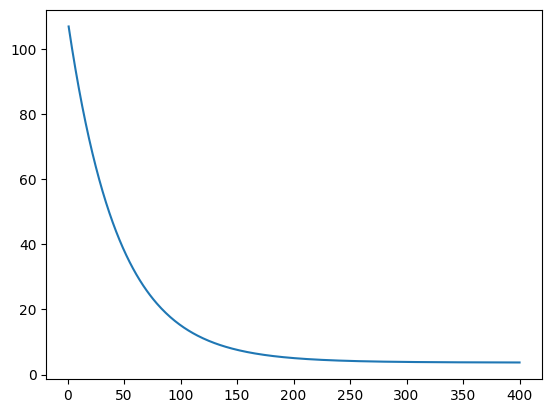

In [ ]:
fig = plt.plot(steps, errors)

In [ ]:
class LinearRegressionSGD:
    def __init__(self, lr=0.01, max_iter=1000, batch_size=32, tol=1e-3, intercept = True):
        # скорость обучения градиентного спуска
        self.learning_rate = lr
        # максимальное число итераций
        self.max_iteration = max_iter
        # размер мини-батча
        self.batch_size = batch_size
        # критерий сходимости
        self.tolerance_convergence  = tol
        # наличие свободного члена
        self.intercept = intercept
        # инициальзация весов: None
        self.theta = None
        self.n = None
        self.d = None

    def fit(self, X, y):
        self.X = X.copy()
        self.y = y.copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))
        # размерность вектора X
        self.n, self.d = self.X.shape
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        step = 0
        for _ in range(self.max_iteration):
            # перемешивание данных
            indices = np.random.permutation(self.n)
            X = self.X[indices]
            y = self.y[indices]
            # цикл по мини-батчам
            for i in range(0, self.n, self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]
                grad = self.gradient(X_batch, y_batch)
                self.theta -= self.learning_rate * grad
            new_error = ((self.y - self.X @ self.theta).T @ (self.y - self.X @ self.theta)) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors

    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)

    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta

    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)

    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()

    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()

Время обучения: 0.013778209686279297
MSE:  3.6895803325507535
Коэффициенты:  [5.83751021 1.1215778  1.64167659 3.00632071 4.21241943 5.03101569]


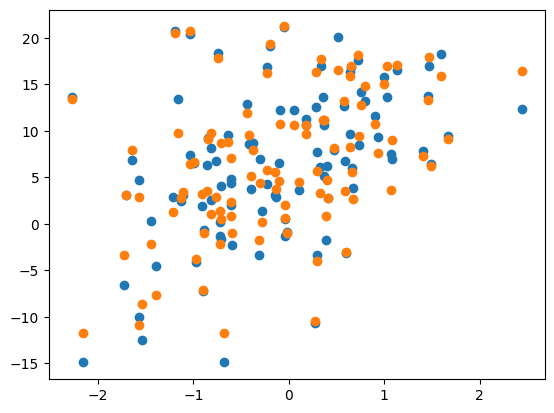

In [ ]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.01, max_iter=50, batch_size=8, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(X, y)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
y_pred = modelSGD.predict(X)
print("MSE: ", np.mean((y_pred - y) ** 2))
print("Коэффициенты: ", modelSGD.theta)
plt.scatter(X[:,2], y)
plt.scatter(X[:,2], y_pred)

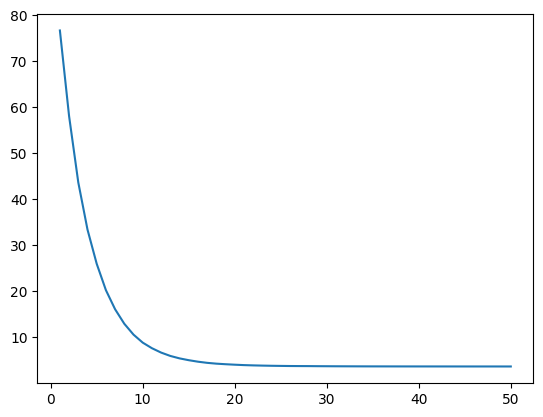

In [ ]:
fig = plt.plot(steps, errors)

In [ ]:
def train_test_split_(x, y, test_size=0.2, random_state=None):
    data = np.concatenate((x, y.reshape(y.shape[0],1)), axis=1)
    # Задаем seed для воспроизводимости результатов, если указан random_state
    if random_state is not None:
        np.random.seed(random_state)

    # Вычисляем количество элементов для тестовой выборки
    num_test = int(len(data) * test_size)

    # Случайно перемешиваем индексы
    shuffled_indices = np.random.permutation(len(data))

    # Выбираем индексы для тестовой выборки
    test_indices = shuffled_indices[:num_test]

    # Выбираем индексы для обучающей выборки
    train_indices = shuffled_indices[num_test:]

    # Разделяем данные на обучающую и тестовую выборки
    train_data = data[train_indices]
    test_data = data[test_indices]

    return train_data[:,:-1], train_data[:,-1], test_data[:,:-1], test_data[:,-1]

In [ ]:
from sklearn import datasets
import pandas as pd
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data)
df.columns = diabetes.feature_names

# Создание нового столбца, содержащего целевую переменную 'y'
# (количественный показатель прогрессирования заболевания
# через год после исходного уровня)
df['diabetes_measure'] = diabetes.target
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(df.head())
x_train, y_train, x_test, y_test = train_test_split_(X, y, test_size = 0.3, random_state = 123)
x_train1 = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
x_test1 = np.hstack((np.ones((x_test.shape[0], 1)), x_test))


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  diabetes_measure  
0 -0.002592  0.019907 -0.017646             151.0  
1 -0.039493 -0.068332 -0.092204              75.0  
2 -0.002592  0.002861 -0.025930             141.0  
3  0.034309  0.022688 -0.009362             206.0  
4 -0.002592 -0.031988 -0.046641             135.0  


Реализуем L2-регуляризацию с помощью прямых вычислений:
\begin{align}w &= (X^TX + \lambda I_d)^{-1}X^Ty\end{align}

l, MSE_test - MSE_train:
1e-20 99.62520656137531
2.5353644939701167e-20 99.62520656137531
6.428073117284345e-20 99.62520656137531
1.6297508346206402e-19 99.62520656137531
4.1320124001153346e-19 99.62520656137531
1.0476157527896661e-18 99.62520656137531
2.6560877829466947e-18 99.62520656137531
6.734150657750801e-18 99.62520656137531
1.7073526474706886e-17 99.62520656137531
4.328761281083062e-17 99.62520656137531
1.097498765493059e-16 99.62520656137485
2.782559402207126e-16 99.62520656137985
7.054802310718631e-16 99.62520656137713
1.788649529057435e-15 99.62520656137667
4.534878508128591e-15 99.62520656137576
1.1497569953977357e-14 99.62520656137576
2.9150530628251696e-14 99.62520656136849
7.390722033525775e-14 99.62520656135894
1.8738174228603867e-13 99.62520656133256
4.750810162102794e-13 99.6252065612639
1.2045035402587836e-12 99.62520656109564
3.0538555088334124e-12 99.62520656066226
7.742636826811278e-12 99.62520655956223
1.9630406500402685e-11 99.6252065567819
4.977023564332114e-11

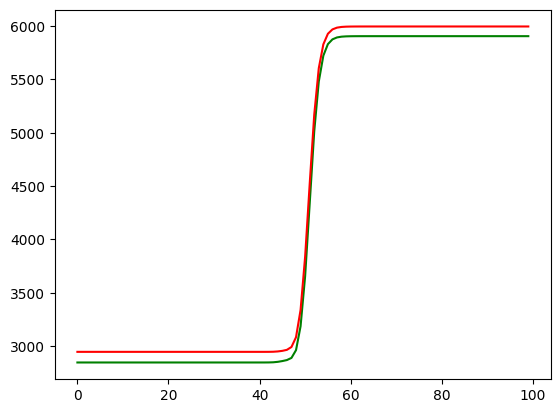

In [ ]:
train_scores, test_scores = [], []
id = np.eye(x_train.shape[1]+1)
id[0][0] = 0
print("l, MSE_test - MSE_train:")
for l in np.logspace(-20, 20, 100):
    w = np.linalg.inv(x_train1.T @ x_train1 + l*id) @ x_train1.T @ y_train
    MSE_train = (y_train - x_train1 @ w).T @ (y_train - x_train1 @ w)/ x_train1.shape[0]
    train_scores.append(MSE_train)
    MSE_test = (y_test - x_test1 @ w).T @ (y_test - x_test1 @ w)/ x_test1.shape[0]
    test_scores.append(MSE_test)
    print(l, MSE_test - MSE_train)
plt.plot(train_scores, 'g')
plt.plot(test_scores, 'r')

start_time = time.time()
w = np.linalg.inv(x_train1.T @ x_train1 + 0.038*id) @ x_train1.T @ y_train
MSE_train = (y_train - x_train1 @ w).T @ (y_train - x_train1 @ w)/ x_train1.shape[0]
MSE_test = (y_test - x_test1 @ w).T @ (y_test - x_test1 @ w)/ x_test1.shape[0]
print("Время обучения:", time.time() - start_time)
print("MSE_train, MSE_test", MSE_train, MSE_test)
print("Коэффициенты: ", w)
print("np.linalg.det(x_train.T @ x_train): ", np.linalg.det(x_train1.T @ x_train1))
print("np.linalg.det(x_train.T @ x_train + 0.43287*id): ", np.linalg.det(x_train1.T @ x_train1 + 0.43287*id))

Время обучения: 0.36867380142211914
MSE_train:  3060.3749576883124
MSE_test:  3187.0956124244867
Коэффициенты:  [ 152.69076152   42.39985986  -97.23634027  374.87515265  217.48366499
   -7.98664919  -39.07988943 -191.9602773   161.10082192  284.13524376
  158.81117188]


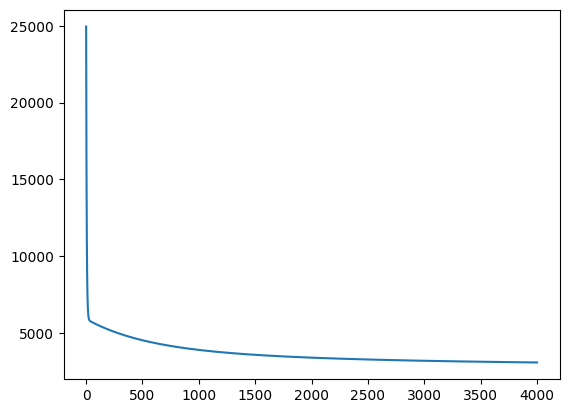

In [ ]:
start_time = time.time()
modelGD = LinearRegressionGD(lr=0.1, max_iter=4000, tol=1e-3, intercept = True)
steps, errors = modelGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelGD.MSE(x_train, y_train))
print("MSE_test: ", modelGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelGD.theta)
plt.plot(steps, errors)

Время обучения: 0.30583715438842773
MSE_train:  2874.4625442680485
MSE_test:  2959.6134711331865
Коэффициенты:  [ 151.5491199    13.4797293  -242.17776999  533.74946446  266.9014214
  -74.58966891 -117.80983904 -206.82247501  169.24586581  390.33279364
  120.62468385]


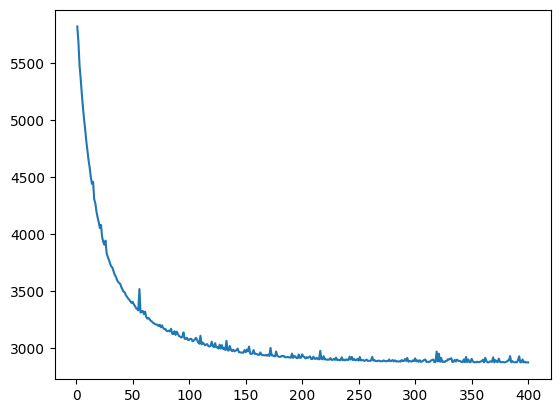

In [ ]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=400, batch_size=8, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelSGD.theta)
plt.plot(steps, errors)

Время обучения: 17.815568685531616
MSE_train:  2849.01077999237
MSE_test:  2952.885736059851
Коэффициенты:  [ 154.02469695    9.47128162 -261.28918569  540.27139365  275.24277731
 -810.919927    441.85906458  135.59908348  294.83540483  669.61255537
  101.81578562]


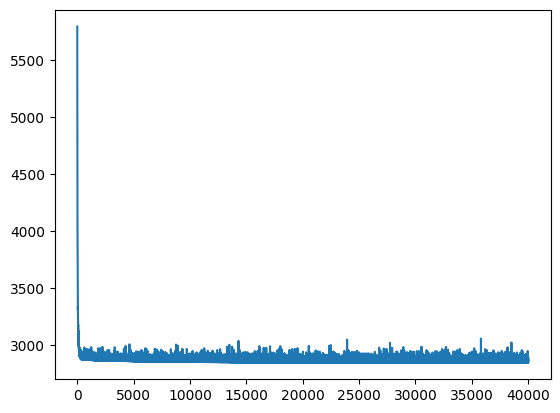

In [ ]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=8, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelSGD.theta)
plt.plot(steps, errors)

Время обучения: 6.965378761291504
MSE_train:  2852.2669089085066
MSE_test:  2948.138277741099
Коэффициенты:  [ 151.66734708   12.01036411 -259.01464652  545.45094896  272.58958392
 -501.5664655   193.26467017    3.31623893  262.40277703  553.35872218
  102.0380112 ]


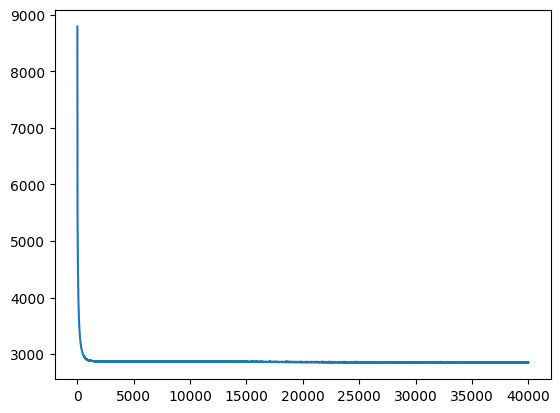

In [ ]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=32, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelSGD.theta)
plt.plot(steps, errors)

Видим, что у стохастического градиентного спуска качество выше, разрыв в качестве на обучающей и тестовой выборке меньше, время выполнения меньше, и чем у обычного градиентного спуска, и чем у прямых вычислений с L2-регуляризацией! При этом стохастический градиентный спуск работает более "шумно". Многое зависит и от оптимального подбора размера мини-батча.



<b>Домашнее задание</b>

Объясните, почему коэффициенты всех построенных моделей сильно отличаются между собой.

Стохастичность градиентного спуска: В методе стохастического градиентного спуска каждый шаг обновления весов зависит от случайно выбранного мини-батча данных. Это вводит стохастичность в процесс оптимизации. Разные мини-батчи могут содержать разные образцы данных, и это может привести к различным обновлениям весов. В результате, коэффициенты могут сильно различаться между моделями, поскольку они проходят через разные пути оптимизации.

Размер батча: Разный размер батча может влиять на процесс обучения. Маленькие батчи могут быть более шумными, но могут сходиться быстрее, в то время как большие батчи могут сглаживать стохастичность, но требовать больше вычислительных ресурсов.

In [ ]:
data = pd.read_csv("housing.csv")
dataset = data.copy()
Y = dataset['Y'].to_numpy()
x = dataset.drop('Y', axis = 1).to_numpy()

x_train, y_train, x_test, y_test = train_test_split_(x, Y, 0.8, 123)

FileNotFoundError: ignored

Сравните скорость и качество обучения моделей регрессии с помощью обычного и стохастического градиентного спуска на наборе данных housing.csv.

Время обучения: 0.3485560417175293
MSE_train:  9.034359171502015
MSE_test:  16.026907908519537


Text(0.5, 1.0, 'Обычный градиентный спуск')

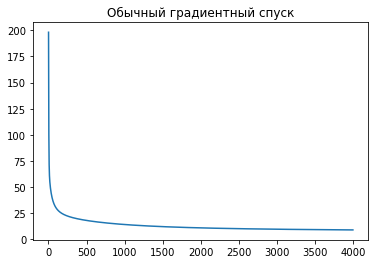

In [ ]:
#Обычный градиентный спуск
start_time = time.time()
modelGD = LinearRegressionGD(lr=0.1, max_iter=4000, tol=1e-3, intercept = True)
steps, errors = modelGD.fit(x_train, y_train)

print("Время обучения:", time.time() - start_time)
print("MSE_train: ", modelGD.MSE(x_train, y_train))
print("MSE_test: ", modelGD.MSE(x_test, y_test))

plt.plot(steps, errors)
plt.title('Обычный градиентный спуск')

Время обучения: 0.27455687522888184
MSE_train:  9.076572141701547
MSE_test:  15.689808792766444


Text(0.5, 1.0, 'Стохастический градиентный спуск')

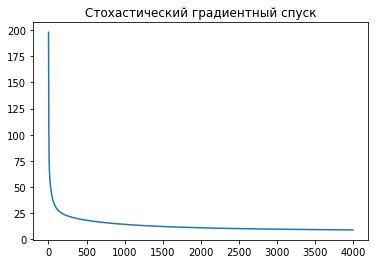

In [ ]:
#Стохастический градиентный спуск
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=4000, tol=1e-3, intercept = True, batch_size= 256)
steps, errors = modelSGD.fit(x_train, y_train)

print("Время обучения:", time.time() - start_time)
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))

plt.plot(steps, errors)
plt.title('Стохастический градиентный спуск')

Подберите в цикле оптимальное, с Вашей точки зрения, значение размера мини-батча и поясните Ваш выбор.

Лучший размер батча: 16
MSE на train: 9.95182781028027
Лучшая MSE на валидации: 15.825538578239144


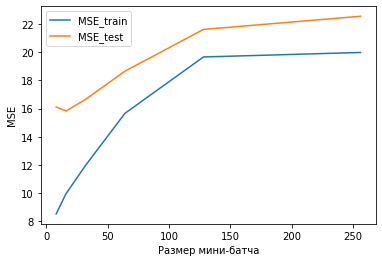

In [ ]:
import matplotlib.pyplot as plt

batch_sizes = [8, 16, 32, 64, 128, 256]

best_batch_size = None
best_mse = float('inf')
best_mse_train = None

MSE_train = []
MSE_test = []

for batch_size in batch_sizes:
    model = LinearRegressionSGD(lr=0.01, max_iter=4000, batch_size=batch_size, tol=1e-3, intercept=True)
    steps, errors = model.fit(x_train, y_train)
    mse_train = model.MSE(x_train, y_train)
    mse_test = model.MSE(x_test, y_test)

    MSE_train.append(mse_train)
    MSE_test.append(mse_test)

    if mse_test < best_mse:
        best_mse = mse_test
        best_mse_train = mse_train
        best_batch_size = batch_size

print("Лучший размер батча:", best_batch_size)
print("MSE на train:", best_mse_train)
print("Лучшая MSE на валидации:", best_mse)

plt.plot(batch_sizes, MSE_train, label='MSE_train')
plt.plot(batch_sizes, MSE_test, label='MSE_test')
plt.xlabel('Размер мини-батча')
plt.ylabel('MSE')
plt.legend()
plt.show()


Реализуйте в классе LinearRegressionSGD стохастический градиентный спуск с регуляризацией L1, L2, ElasticNet и подберите оптимальные параметры регуляризации, чтобы сократить разрыв качества на обучающей и тестовой выборке.

In [ ]:
import numpy as np

class LinearRegressionSGD:
    def __init__(self, lr=0.01, max_iter=1000, batch_size=32, tol=1e-3, intercept=True, penalty=None, lambda_1=0.1, lambda_2=0.5):
        self.learning_rate = lr
        self.max_iteration = max_iter
        self.batch_size = batch_size
        self.tolerance_convergence = tol
        self.intercept = intercept
        self.theta = None
        self.n = None
        self.d = None
        self.penalty = penalty
        self.lambda_1 = lambda_1
        self.lambda_2 = lambda_2

    def gradient(self, X, y):
        grad = X.T @ (X @ self.theta - y) / len(y)
        if self.penalty == 'L1':
            grad += self.lambda_1 * np.sign(self.theta)
        elif self.penalty == 'L2':
            grad += 2 * self.lambda_1 * self.theta
        elif self.penalty == 'ElasticNet':
            grad += self.lambda_1 * (self.lambda_2 * np.sign(self.theta) + (1 - self.lambda_2) * 2 * self.theta)
        return grad

    def fit(self, X, y):
        self.X = X.copy()
        self.y = y.copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))
        # размерность вектора X
        self.n, self.d = self.X.shape
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        step = 0
        for _ in range(self.max_iteration):
            # перемешивание данных
            indices = np.random.permutation(self.n)
            X = self.X[indices]
            y = self.y[indices]
            # цикл по мини-батчам
            for i in range(0, self.n, self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]
                grad = self.gradient(X_batch, y_batch)
                self.theta -= self.learning_rate * grad
            new_error = ((self.y - self.X @ self.theta).T @ (self.y - self.X @ self.theta)) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors

    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta

    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)

    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()

    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()


In [ ]:
best_score = float('inf')
best_params = {}

regularization_values = [None, 'L1', 'L2', 'ElasticNet']
lambda_1_values = [0.00001, 0.0001, 0.001, 0.01, 0.1]
lambda_2_values = [0.00001, 0.0001, 0.001, 0.01, 0.1]

for regularization in regularization_values:
    for lambda_1 in lambda_1_values:
        for lambda_2 in lambda_2_values:
            model = LinearRegressionSGD(lr=0.01, max_iter=4000, batch_size=16, tol=1e-3, intercept=True, penalty = regularization, lambda_1 = lambda_1 , lambda_2 = lambda_2 )
            model.fit(x_train, y_train)
            test_score = model.MSE(x_test, y_test)

            if test_score < best_score:
                    best_score = test_score
                    best_params = {
                        'regularization': regularization,
                        'lambda_1': lambda_1,
                        'lambda_2': lambda_2
                    }

print("Лучшие параметры:", best_params)
print("Лучшая оценка (MSE):", best_score)

Лучшие параметры: {'regularization': 'L1', 'lambda_1': 0.0001, 'lambda_2': 0.0001}
Лучшая оценка (MSE): 15.212557316020103


Лучшие параметры: {'regularization': 'L1', 'lambda_1': 0.001}
Лучшая оценка (MSE): 15.228812984140202


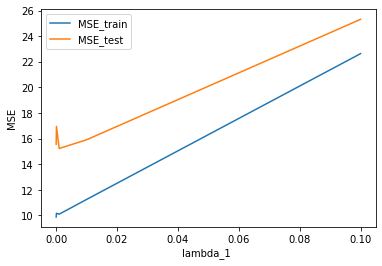

In [ ]:
best_score = float('inf')
best_params = {}

lambda_1_values = [0.00001, 0.0001, 0.001, 0.01, 0.1]
test = []
train = []

for lambda_1 in lambda_1_values:
            model = LinearRegressionSGD(lr=0.01, max_iter=4000, batch_size=16, tol=1e-3, intercept=True, penalty = 'L1', lambda_1 = lambda_1, lambda_2 = None )
            model.fit(x_train, y_train)

            train_score = model.MSE(x_train, y_train)
            test_score = model.MSE(x_test, y_test)

            test.append(test_score)
            train.append(train_score)

            if test_score < best_score:
                    best_score = test_score
                    best_params = {
                        'regularization': 'L1',
                        'lambda_1': lambda_1
                    }

print("Лучшие параметры:", best_params)
print("Лучшая оценка (MSE):", best_score)

plt.plot(lambda_1_values, train, label='MSE_train')
plt.plot(lambda_1_values, test, label='MSE_test')
plt.xlabel('lambda_1 ')
plt.ylabel('MSE')
plt.legend()
plt.show()
